In [22]:

#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTRODUCTION TO TEXT MINING PART1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs



In [1]:
#=================================================-
#### Slide 15: Directory settings  ####

from pathlib import Path
# Set `home_dir` to the root directory of your computer. 
home_dir = Path.home()

# Set `main_dir` to the location of your `booz-allen-hamilton` folder.
main_dir = home_dir / "Documents" / "NLP_Intro" / "intro-to-text-mining-main"

# Make `data_dir` from the `main_dir` and remainder of the path to data directory.
data_dir = main_dir / "data"




In [2]:
print(data_dir)

/Users/amirmokhtari/Documents/NLP_Intro/intro-to-text-mining-main/data


In [3]:
#=================================================-
#### Slide 16: Working directory  ####
import os
# Set working directory.
os.chdir(data_dir)

# Check working directory.
print(os.getcwd())



/Users/amirmokhtari/Documents/NLP_Intro/intro-to-text-mining-main/data


In [4]:
#=================================================-
#### Slide 17: Loading packages  ####

# Helper packages.
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Packages with tools for text processing.
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer



In [5]:
#=================================================-
#### Slide 29: Loading text data  ####

# Load corpus from a csv (for Mac).
NYT = pd.read_csv('NYT_article_data.csv')
print(NYT.columns)



Index(['web_url', 'headline', 'snippet', 'word_count', 'source',
       'type_of_material', 'date'],
      dtype='object')


In [6]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amirmokhtari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
NYT.head()

,web_url,headline,snippet,word_count,source,type_of_material,date
0,https://www.nytimes.com/reuters/2019/01/01/spo...,Pakistan Look to Fix Batting Woes Against Host...,Pakistan's struggling batsmen must find a way ...,571,Reuters,News,2019-01-01
1,https://www.nytimes.com/reuters/2019/01/01/spo...,NFL: League Under Scrutiny for Lack of Minorit...,The National Football League is under the micr...,393,Reuters,News,2019-01-01
2,https://www.nytimes.com/reuters/2019/01/01/spo...,Golf: Pressure On to Strike While Iron Hot Wit...,Hitting a hot streak at the right time will be...,846,Reuters,News,2019-01-01
3,https://www.nytimes.com/aponline/2019/01/01/wo...,Papal Ode to Motherhood Ushers in 2019 After D...,Pope Francis ushered in the New Year with an o...,306,AP,News,2019-01-01
4,https://www.nytimes.com/reuters/2019/01/01/spo...,"Froome, Thomas to Skip Giro d'Italia and Focus...",Chris Froome will not defend his Giro d'Italia...,265,Reuters,News,2019-01-01


In [10]:
#=================================================-
#### Slide 30: The data at first glance  ####

# Look at the columns.
print(NYT.head())



                                             web_url  \
0  https://www.nytimes.com/reuters/2019/01/01/spo...   
1  https://www.nytimes.com/reuters/2019/01/01/spo...   
2  https://www.nytimes.com/reuters/2019/01/01/spo...   
3  https://www.nytimes.com/aponline/2019/01/01/wo...   
4  https://www.nytimes.com/reuters/2019/01/01/spo...   

                                            headline  \
0  Pakistan Look to Fix Batting Woes Against Host...   
1  NFL: League Under Scrutiny for Lack of Minorit...   
2  Golf: Pressure On to Strike While Iron Hot Wit...   
3  Papal Ode to Motherhood Ushers in 2019 After D...   
4  Froome, Thomas to Skip Giro d'Italia and Focus...   

                                             snippet  word_count   source  \
0  Pakistan's struggling batsmen must find a way ...         571  Reuters   
1  The National Football League is under the micr...         393  Reuters   
2  Hitting a hot streak at the right time will be...         846  Reuters   
3  Pope Francis us

In [11]:
#=================================================-
#### Slide 31: Creating a list of snippets  ####

# Isolate the snippet column.
NYT_snippet = NYT["snippet"]

# Look at a sample of the snippet column, 0-15.
print(NYT["snippet"][0:15])



0     Pakistan's struggling batsmen must find a way ...
1     The National Football League is under the micr...
2     Hitting a hot streak at the right time will be...
3     Pope Francis ushered in the New Year with an o...
4     Chris Froome will not defend his Giro d'Italia...
5     Pakistan's former Prime Minister Nawaz Sharif ...
6     Thousands of demonstrators marched in Hong Kon...
7     Nick Kyrgios started his Brisbane Open title d...
8     British police confirmed on Tuesday they were ...
9     Marcellus Wiley is still on the fence about le...
10    Still reckoning with the fallout from her Emme...
11    As far as Arike Ogunbowale and coach Muffet Mc...
12    A prohibition on "whole-home" vacation rentals...
13           Does contaminated food smell like freedom?
14    There's no end in sight to the partial federal...
Name: snippet, dtype: object


In [12]:
#=================================================-
#### Slide 33: Exercise 1  ####





In [13]:
#=================================================-
#### Slide 42: Tokenization: split each snippet into words  ####

# Tokenize each snippet into a large list of tokenized snippets.
NYT_tokenized = [word_tokenize(NYT_snippet[i]) for i in range(0, len(NYT_snippet))]



In [14]:
NYT_tokenized[0]

['Pakistan',
 "'s",
 'struggling',
 'batsmen',
 'must',
 'find',
 'a',
 'way',
 'to',
 'handle',
 'South',
 'Africa',
 "'s",
 'potent',
 'pace',
 'attack',
 'if',
 'they',
 'are',
 'to',
 'claw',
 'their',
 'way',
 'back',
 'into',
 'the',
 'three-match',
 'series',
 'in',
 'the',
 'second',
 'test',
 'that',
 'starts',
 'on',
 'what',
 'is',
 'likely',
 'to',
 'be',
 'a',
 'lively',
 'Newlands',
 'wicket',
 'on',
 'Thursday',
 '.']

In [15]:
#=================================================-
#### Slide 43: Save the first tokenized snippet  ####

# Let's take a look at the first tokenized snippet.
snippet_words = NYT_tokenized[0]
print(snippet_words)



['Pakistan', "'s", 'struggling', 'batsmen', 'must', 'find', 'a', 'way', 'to', 'handle', 'South', 'Africa', "'s", 'potent', 'pace', 'attack', 'if', 'they', 'are', 'to', 'claw', 'their', 'way', 'back', 'into', 'the', 'three-match', 'series', 'in', 'the', 'second', 'test', 'that', 'starts', 'on', 'what', 'is', 'likely', 'to', 'be', 'a', 'lively', 'Newlands', 'wicket', 'on', 'Thursday', '.']


In [16]:
#=================================================-
#### Slide 45: Convert characters to lower case  ####

# 1. Convert to lower case.
snippet_words = [word.lower() for word in snippet_words]
print(snippet_words[:10])



['pakistan', "'s", 'struggling', 'batsmen', 'must', 'find', 'a', 'way', 'to', 'handle']


In [17]:
#=================================================-
#### Slide 47: Remove stop words  ####

# 2. Remove stop words.
# Get common English stop words.
stop_words = stopwords.words('english')
print(stop_words[:10])

# Remove stop words.
snippet_words = [word for word in snippet_words if not word in stop_words]
print(snippet_words[:10])



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['pakistan', "'s", 'struggling', 'batsmen', 'must', 'find', 'way', 'handle', 'south', 'africa']


In [18]:
#=================================================-
#### Slide 49: Remove non-alphabetical characters  ####

# 3. Remove punctuation and any non-alphabetical characters.
snippet_words = [word for word in snippet_words if word.isalpha()]
# also try .isalnum()
print(snippet_words[:10])



['pakistan', 'struggling', 'batsmen', 'must', 'find', 'way', 'handle', 'south', 'africa', 'potent']


In [19]:
#=================================================-
#### Slide 52: Stem words  ####

# 4. Stem words.
snippet_words = [PorterStemmer().stem(word) for word in snippet_words]
print(snippet_words[:10])



['pakistan', 'struggl', 'batsmen', 'must', 'find', 'way', 'handl', 'south', 'africa', 'potent']


In [22]:
len(NYT_tokenized)

250

In [23]:
#=================================================-
#### Slide 53: Implementing pre-processing steps on a corpus  ####

# Create a list for clean snippets.
NYT_clean = [None] * len(NYT_tokenized)
# Create a list of word counts for each clean snippet.
word_counts_per_snippet = [None] * len(NYT_tokenized)

# Process words in all snippets.
for i in range(len(NYT_tokenized)):
    # 1. Convert to lower case.
    NYT_clean[i] = [snippet.lower() for snippet in NYT_tokenized[i]]

    # 2. Remove stop words.
    NYT_clean[i] = [word for word in NYT_clean[i] if not word in stop_words]

    # 3. Remove punctuation and any non-alphabetical characters.
    NYT_clean[i] = [word for word in NYT_clean[i] if word.isalpha()]

    # 4. Stem words.
    NYT_clean[i] = [PorterStemmer().stem(word) for word in NYT_clean[i]]

    # Record the word count per snippet.
    word_counts_per_snippet[i] = len(NYT_clean[i])



In [24]:
#=================================================-
#### Slide 54: Inspect results  ####

print(NYT_clean[0][:10])
print(NYT_clean[5][:10])
print(NYT_clean[10][:10])
print(NYT_clean[15][:10])
print(NYT_clean[20][:10])



['pakistan', 'struggl', 'batsmen', 'must', 'find', 'way', 'handl', 'south', 'africa', 'potent']
['pakistan', 'former', 'prime', 'minist', 'nawaz', 'sharif', 'appeal', 'convict', 'prison', 'sentenc']
['still', 'reckon', 'fallout', 'emmett', 'till', 'paint', 'chasten', 'artist', 'reveal', 'controversi']
['bottleneck', 'offload', 'import', 'fuel', 'form', 'mexican', 'oil', 'port', 'follow', 'govern']
['taiwanes', 'presid', 'tsai', 'appoint', 'close', 'polit', 'alli', 'premier', 'cabinet', 'reshuffl']


In [27]:
len(set(word_counts_per_snippet))

27

[24, 12, 19, 20, 19, 15, 23, 15, 22, 27]


Text(0, 0.5, 'Frequency')

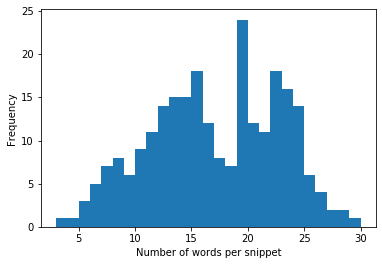

In [42]:
#=================================================-
#### Slide 55: Removing empty and very short snippets  ####

# Let's take a look at total word counts per snippet (for the first 10). 
print(word_counts_per_snippet[:10])

# Plot a histogram for word counts per snippet, set bins to number of unique values in the list. 
plt.hist(word_counts_per_snippet, bins = len(set(word_counts_per_snippet))) 
plt.xlabel('Number of words per snippet') 
plt.ylabel('Frequency')

In [28]:
#=================================================-
#### Slide 56: Removing empty and very short snippets (cont'd)  ####

# Convert word counts list and snippets list to numpy arrays.
word_counts_array = np.array(word_counts_per_snippet)
NYT_array = np.array(NYT_clean)

print(len(NYT_array))

# Find indices of all snippets where there are greater than or equal to 5 words.
valid_snippets = np.where(word_counts_array >= 5)[0]
print(len(valid_snippets))



250
248


In [44]:
#=================================================-
#### Slide 57: Removing empty and very short snippets (cont'd)  ####

# Subset the NYT_array to keep only those where there are at least 5 words.
NYT_array = NYT_array[valid_snippets]
print(len(NYT_array))

# Convert the array back to a list.
NYT_clean = NYT_array.tolist()
print(NYT_clean[:5])



248
[['pakistan', 'struggl', 'batsmen', 'must', 'find', 'way', 'handl', 'south', 'africa', 'potent', 'pace', 'attack', 'claw', 'way', 'back', 'seri', 'second', 'test', 'start', 'like', 'live', 'newland', 'wicket', 'thursday'], ['nation', 'footbal', 'leagu', 'microscop', 'lack', 'minor', 'head', 'coach', 'recent', 'slew', 'fire', 'leagu'], ['hit', 'hot', 'streak', 'right', 'time', 'goal', 'golf', 'top', 'male', 'profession', 'year', 'new', 'calendar', 'cram', 'major', 'championship', 'super', 'busi', 'stretch'], ['pope', 'franci', 'usher', 'new', 'year', 'ode', 'motherhood', 'tuesday', 'remind', 'faith', 'mother', 'exampl', 'embrac', 'best', 'antidot', 'today', 'disjoint', 'world', 'solitud', 'miseri'], ['chri', 'froom', 'defend', 'giro', 'titl', 'year', 'choos', 'focu', 'win', 'fifth', 'tour', 'de', 'franc', 'crown', 'instead', 'team', 'sky', 'announc', 'tuesday']]


In [45]:
#=================================================-
#### Slide 58: .join() function  ####

# Here is a simple example of the `.join()` function in action!
numList = ['1', '2', '3', '4']
print(', '.join(numList))



1, 2, 3, 4


In [35]:
#=================================================-
#### Slide 59: Save processed text to file using .join()  ####

# Join words in each snippet into a single character string.
NYT_clean_list = [' '.join(snippet) for snippet in NYT_clean]
print(NYT_clean_list[:5])

# Save output file name to a variable.
out_filename = "clean_NYT.txt"

# Create a function that takes a list of character strings
# and a name of an output file and writes it into a txt file.
def write_lines(lines, filename):    #<- given lines to write and filename
    joined_lines = '\n'.join(lines)  #<- join lines with line breaks
    file = open( out_filename, 'w')  #<- open write only file
    file.write(joined_lines)         #<- write lines to file
    file.close()                     #<- close connection

# Write sequences to file.
write_lines(NYT_clean_list, out_filename)



['pakistan struggl batsmen must find way handl south africa potent pace attack claw way back seri second test start like live newland wicket thursday', 'nation footbal leagu microscop lack minor head coach recent slew fire leagu', 'hit hot streak right time goal golf top male profession year new calendar cram major championship super busi stretch', 'pope franci usher new year ode motherhood tuesday remind faith mother exampl embrac best antidot today disjoint world solitud miseri', 'chri froom defend giro titl year choos focu win fifth tour de franc crown instead team sky announc tuesday']


In [36]:
#=================================================-
#### Slide 62: Exercise 2  ####





In [37]:
#=================================================-
#### Slide 67: Create a DTM  ####

# Initialize `CountVectorizer`. This library is available through scikit-learn
vec = CountVectorizer()

# Transform the list of snippets into DTM.
X = vec.fit_transform(NYT_clean_list)
print(X.toarray()) #<- show output as a matrix

print(vec.get_feature_names()[:10])



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['abduct', 'abl', 'abo', 'absente', 'abus', 'academ', 'accept', 'access', 'accessori', 'accommod']


In [38]:
#=================================================-
#### Slide 68: Create a DTM (cont'd)  ####

# Convert the matrix into a pandas dataframe for easier manipulation.
DTM = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
print(DTM.head())



   abduct  abl  abo  absente  abus  academ  accept  access  accessori  \
0       0    0    0        0     0       0       0       0          0   
1       0    0    0        0     0       0       0       0          0   
2       0    0    0        0     0       0       0       0          0   
3       0    0    0        0     0       0       0       0          0   
4       0    0    0        0     0       0       0       0          0   

   accommod  ...  writer  xinhua  year  yell  yet  york  young  yuan  zimbabw  \
0         0  ...       0       0     0     0    0     0      0     0        0   
1         0  ...       0       0     0     0    0     0      0     0        0   
2         0  ...       0       0     1     0    0     0      0     0        0   
3         0  ...       0       0     1     0    0     0      0     0        0   
4         0  ...       0       0     1     0    0     0      0     0        0   

   zykera  
0       0  
1       0  
2       0  
3       0  
4       0  

[

In [39]:
#=================================================-
#### Slide 69: DTM to dictionary of total word counts  ####

# Create a convenience function that sorts and looks at first n-entries in the dictionary.
def HeadDict(dict_x, n):
    # Get items from the dictionary and sort them by
    # value key in descending (i.e. reverse) order
    sorted_x = sorted(dict_x.items(),
                      reverse = True,
                      key = lambda kv: kv[1])

    # Convert sorted dictionary to a list.
    dict_x_list = list(sorted_x)

    # Return the first `n` values from the dictionary only.
    return(dict(dict_x_list[:n]))



In [40]:
#=================================================-
#### Slide 70: DTM to dictionary of total word counts (cont'd)  ####

# Sum frequencies of each word in all documents.
DTM.sum(axis = 0).head()

# Save series as a dictionary.
corpus_freq_dist = DTM.sum(axis = 0).to_dict()

# Glance at the frequencies.
print(HeadDict(corpus_freq_dist, 6))




{'said': 42, 'new': 39, 'year': 32, 'presid': 29, 'friday': 22, 'govern': 22}


In [44]:
DTM.sum(axis=0)

abduct     1
abl        1
abo        1
absente    1
abus       2
          ..
york       8
young      5
yuan       1
zimbabw    1
zykera     1
Length: 1924, dtype: int64

In [52]:
#=================================================-
#### Slide 73: Save results as a pickle  ####

pickle.dump(DTM, open('DTM.sav', 'wb'))
pickle.dump(word_counts_array, open('word_counts_array.sav', 'wb'))
pickle.dump(NYT_clean, open('NYT_clean.sav', 'wb'))
pickle.dump(NYT_clean_list, open('NYT_clean_list.sav', 'wb'))
pickle.dump(corpus_freq_dist, open('corpus_freq_dist.sav', 'wb'))
pickle.dump(X, open('DTM_matrix.sav', 'wb'))
pickle.dump(valid_snippets, open('valid_snippets.sav', 'wb'))

In [53]:
#=================================================-
#### Slide 75: Exercise 3  ####



